<a href="https://colab.research.google.com/github/Bharathyramakrishnan/Applied-Generative-AI-Specialization/blob/main/Autoencoder.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#pip install --upgrade tensorflow keras
import cv2
import numpy as np
import matplotlib.pyplot as plt
import keras
from keras import layers
from google.colab.patches import cv2_imshow
from tensorflow import keras
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model
from tensorflow.keras.datasets import mnist
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.utils import to_categorical

In [ ]:
img_color = cv2.imread('/content/Image.jpg',cv2.IMREAD_COLOR)

array([[[ 76, 121,  28],
        [ 76, 121,  28],
        [ 76, 121,  28],
        ...,
        [192, 215, 125],
        [192, 215, 127],
        [192, 215, 127]],

       [[ 76, 121,  28],
        [ 76, 121,  28],
        [ 76, 121,  28],
        ...,
        [192, 215, 125],
        [192, 215, 127],
        [192, 215, 127]],

       [[ 77, 120,  28],
        [ 77, 120,  28],
        [ 77, 120,  28],
        ...,
        [192, 215, 125],
        [192, 215, 125],
        [192, 215, 125]],

       ...,

       [[ 43,  69,   8],
        [ 43,  69,   8],
        [ 43,  69,   8],
        ...,
        [148, 187,  46],
        [148, 187,  46],
        [148, 187,  46]],

       [[ 44,  70,   9],
        [ 44,  70,   9],
        [ 44,  70,   9],
        ...,
        [148, 187,  46],
        [148, 187,  46],
        [148, 187,  46]],

       [[ 45,  71,  10],
        [ 45,  71,  10],
        [ 45,  71,  10],
        ...,
        [148, 187,  46],
        [148, 187,  46],
        [148, 187,  46]]], dtype=uint8)
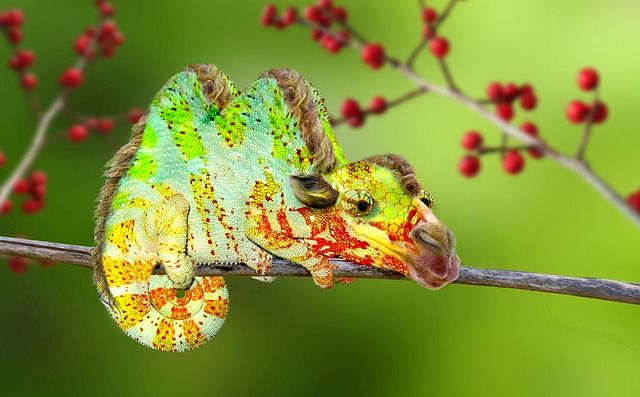

In [ ]:
img_rgb = cv2.cvtColor(img_color, cv2.COLOR_BGR2RGB)
#img_gray = cv2.cvtColor(img_color, cv2.COLOR_BGR2GRAY)
#img_hsv = cv2.cvtColor(img_color, cv2.COLOR_BGR2HSV)

img_rgb

array([[ 97,  97,  97, ..., 198, 198, 198],
       [ 97,  97,  97, ..., 198, 198, 198],
       [ 97,  97,  97, ..., 198, 198, 198],
       ...,
       [ 54,  54,  54, ..., 159, 159, 159],
       [ 55,  55,  55, ..., 159, 159, 159],
       [ 56,  56,  56, ..., 159, 159, 159]], dtype=uint8)
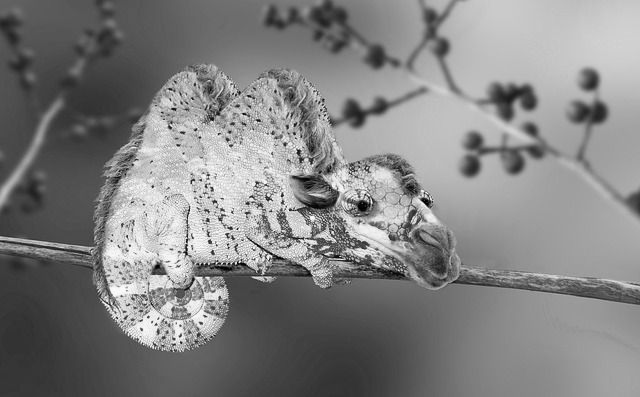

In [ ]:
img_gray

array([[[ 45, 196, 121],
        [ 45, 196, 121],
        [ 45, 196, 121],
        ...,
        [ 38, 107, 215],
        [ 38, 104, 215],
        [ 38, 104, 215]],

       [[ 45, 196, 121],
        [ 45, 196, 121],
        [ 45, 196, 121],
        ...,
        [ 38, 107, 215],
        [ 38, 104, 215],
        [ 38, 104, 215]],

       [[ 44, 196, 120],
        [ 44, 196, 120],
        [ 44, 196, 120],
        ...,
        [ 38, 107, 215],
        [ 38, 107, 215],
        [ 38, 107, 215]],

       ...,

       [[ 43, 225,  69],
        [ 43, 225,  69],
        [ 43, 225,  69],
        ...,
        [ 38, 192, 187],
        [ 38, 192, 187],
        [ 38, 192, 187]],

       [[ 43, 222,  70],
        [ 43, 222,  70],
        [ 43, 222,  70],
        ...,
        [ 38, 192, 187],
        [ 38, 192, 187],
        [ 38, 192, 187]],

       [[ 43, 219,  71],
        [ 43, 219,  71],
        [ 43, 219,  71],
        ...,
        [ 38, 192, 187],
        [ 38, 192, 187],
        [ 38, 192, 187]]], dtype=uint8)
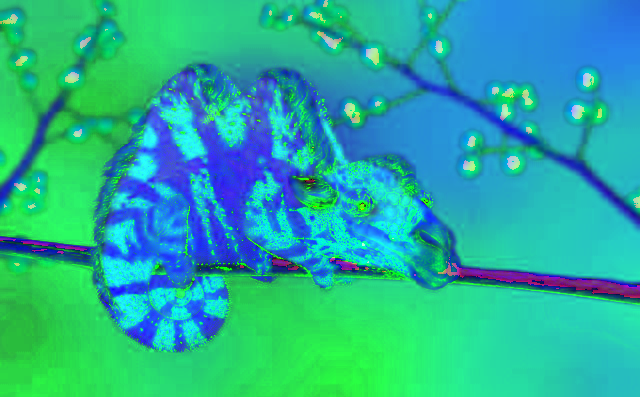

In [ ]:
img_hsv

In [ ]:
img_rgb.shape

(397, 640, 3)

In [ ]:
height, width, channels = img_rgb.shape
print(f"Image dimensions: {height}x{width}x{channels}")

Image dimensions: 397x640x3


In [ ]:
#image_array = img_rgb.reshape(1, height * width * channels).astype('float32')/255.0

# Normalize pixel values and flatten the image
image_array = img_rgb.astype(np.float32) / 255.0
image_array = image_array.reshape(1, height * width * channels)

In [ ]:
height , width , channels


(397, 640, 3)

In [ ]:
# Split into training and testing sets
x_train = image_array
x_test = image_array

In [ ]:
# Autoencoder dimensions
input_dim = height * width * channels
hidden_dim = 64
code_dim = 32
epoch = 100

In [ ]:
print(input_dim)

762240


In [ ]:
# Encoder

input_img = Input(shape=(input_dim,))

encoded = Dense(hidden_dim, activation='relu')
encoded_output = encoded(input_img)

code = Dense(code_dim , activation='relu')
code_output = code(encoded_output)


In [ ]:
# Decoder
decoded = Dense(hidden_dim, activation='relu')
decoded_output = decoded(code_output)

output = Dense(input_dim, activation='sigmoid')
output_img = output(decoded_output)

In [ ]:
print(input_img)

<KerasTensor shape=(None, 762240), dtype=float32, sparse=False, name=keras_tensor_5>


In [ ]:
# Define Autoencoder
autoencoder = keras.Model(inputs=input_img, outputs=output_img)
# compile
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

In [ ]:
print(f"Autoencoder input shape: {autoencoder.input_shape}")

Autoencoder input shape: (None, 762240)


In [ ]:
X_train = X_train.astype('float32') / 255.
X_test = X_test.astype('float32') / 255.
X_train = X_train.reshape((len(X_train), np.prod(X_train.shape[1:])))
X_test = X_test.reshape((len(X_test), np.prod(X_test.shape[1:])))
print(X_train.shape)
print(X_test.shape)


(1, 762240)
(1, 762240)


In [ ]:
# Ensure the shapes match the expected input shape
print("X_train shape:", X_train.shape)
print("Expected input shape:", autoencoder.input_shape)

X_train shape: (1, 762240)
Expected input shape: (None, 762240)


In [ ]:
pip install --upgrade tensorflow keras

In [ ]:
autoencoder.fit(X_train, X_train,
                epochs=epoch,
                validation_data=(X_test,X_test))

Epoch 1/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - loss: 0.0151 - val_loss: 0.0149
Epoch 2/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step - loss: 0.0149 - val_loss: 0.0147
Epoch 3/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - loss: 0.0147 - val_loss: 0.0145
Epoch 4/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - loss: 0.0145 - val_loss: 0.0144
Epoch 5/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - loss: 0.0144 - val_loss: 0.0142
Epoch 6/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 0.0142 - val_loss: 0.0140
Epoch 7/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 0.0140 - val_loss: 0.0139
Epoch 8/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step - loss: 0.0139 - val_loss: 0.0137
Epoch 9/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step - loss: 0.0137 - val_loss: 0.0136
Epoch 10/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 0.0136 - val_loss: 0.0135
Epoch 11/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step - loss: 0.0135 - val_loss: 0.0133
Epoch 12/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step - loss: 0.0133 - val_loss: 0.0132
Epoch 13/100


In [ ]:
# Predict the reconstructed image
decoded_imgs = autoencoder.predict(X_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step


In [ ]:
print(decoded_imgs)

[[0.00112032 0.00195931 0.00029784 ... 0.00236408 0.00290204 0.00056023]]


In [ ]:
decoded_imgs_reshaped = decoded_imgs.reshape(height, width, channels)

In [ ]:
print(decoded_imgs_reshaped)

[[[0.00112032 0.00195931 0.00029784]
  [0.00113024 0.00195918 0.00033297]
  [0.00109629 0.00195658 0.00029815]
  ...
  [0.0029799  0.00333787 0.00202096]
  [0.00297841 0.00333909 0.0020531 ]
  [0.00297765 0.00333644 0.00205057]]

 [[0.00108283 0.00195735 0.00030823]
  [0.00110978 0.00195652 0.00029633]
  [0.0011148  0.0019602  0.00030891]
  ...
  [0.00298068 0.00333659 0.00202593]
  [0.0029796  0.00333808 0.00205102]
  [0.00297608 0.00333816 0.00205465]]

 [[0.00112052 0.00194317 0.0003013 ]
  [0.00112873 0.00194488 0.00031633]
  [0.00114658 0.00194164 0.00029094]
  ...
  [0.00297791 0.0033349  0.00202159]
  [0.00297696 0.00334355 0.00202328]
  [0.00297835 0.00333391 0.00202078]]

 ...

 [[0.00049956 0.00096153 0.00013768]
  [0.0005043  0.00095024 0.00016495]
  [0.00047905 0.00095881 0.00015424]
  ...
  [0.00235673 0.00290222 0.00054118]
  [0.00235908 0.0029027  0.00052145]
  [0.00234958 0.00290205 0.00056962]]

 [[0.00050041 0.00097101 0.0001577 ]
  [0.00052792 0.00098724 0.00016224]


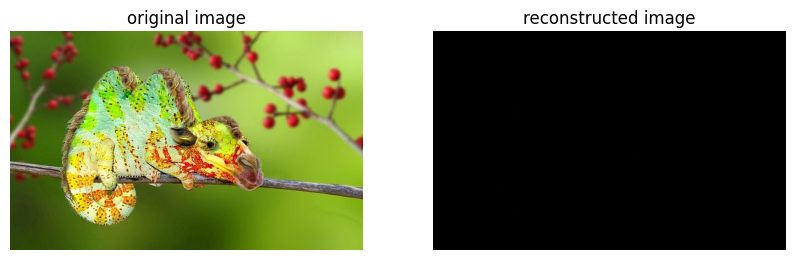

In [ ]:
plt.figure(figsize=(10, 8))

ax=plt.subplot(1,2,1)
plt.imshow(img_rgb)
plt.title("original image")
plt.axis('off')

ax=plt.subplot(1,2,2)
plt.imshow(decoded_imgs_reshaped)
plt.title("reconstructed image")
plt.axis('off')

plt.show()